In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

from sklearn.model_selection import train_test_split

import xgboost as xgb

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [12]:
df=pd.read_csv("SolarPrediction.csv")


In [13]:
df['Data']=df['Data'].apply(lambda x: x.split()[0])

In [14]:
df['Month']=pd.to_datetime(df['Data']).dt.month
df['Day']=pd.to_datetime(df['Data']).dt.day
df['Year']=pd.to_datetime(df['Data']).dt.year
df['Hour']=pd.to_datetime(df['Time']).dt.hour
df['Minute']=pd.to_datetime(df['Time']).dt.minute
df['Second']=pd.to_datetime(df['Time']).dt.second

In [15]:
df['SunriseHour'] = df['TimeSunRise'].astype(str).apply(lambda x: re.search(r'^\d+', x).group(0) if re.search(r'^\d+', x) else np.nan).astype(float).fillna(0).astype(int)
df['SunriseMinute'] = df['TimeSunRise'].astype(str).apply(lambda x: re.search(r':(\d+)', x).group(1) if re.search(r':(\d+)', x) else np.nan).astype(float).fillna(0).astype(int)
df['SunsetHour'] = df['TimeSunSet'].astype(str).apply(lambda x: re.search(r':(\d+)', x).group(1) if re.search(r':(\d+)', x) else np.nan).astype(float).fillna(0).astype(int)
df['SunsetMinute'] = df['TimeSunSet'].astype(str).apply(lambda x: re.search(r':(\d+)', x).group(1) if re.search(r':(\d+)', x) else np.nan).astype(float).fillna(0).astype(int)

In [16]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
input_features=df.drop(['Radiation'],axis=1)
output_features=df['Radiation']

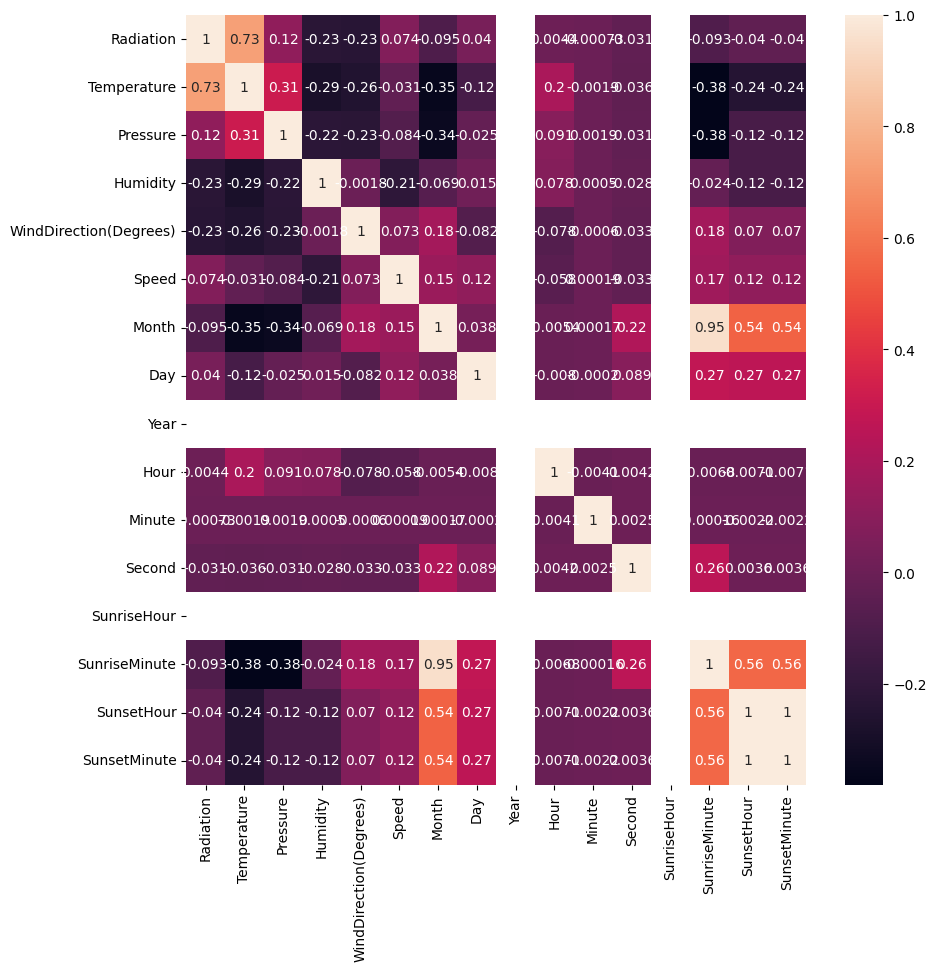

In [19]:
cor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

In [20]:
del df

In [21]:
output_features = output_features.fillna(0).apply(lambda x: int(x * 100))

In [22]:
scalar=MinMaxScaler()
scaled_input_features=scalar.fit_transform(input_features)
input_features_columns=input_features.columns

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming scaled_input_features and output_features are defined

# Create an imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
scaled_input_features_imputed = imputer.fit_transform(scaled_input_features)

# Now use the imputed data for feature selection
feature_selector = SelectKBest(chi2, k='all')
selected_features = feature_selector.fit(scaled_input_features_imputed, output_features)

In [24]:
imp=pd.DataFrame(selected_features.scores_,index=input_features_columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False, inplace=True)
imp

,Importance
Month,4684.579610
SunriseMinute,4015.062771
WindDirection(Degrees),3271.827277
Day,2841.926850
Minute,2702.449333
Second,2288.673032
SunsetHour,1863.712087
SunsetMinute,1863.712087
Temperature,1651.685632
Humidity,1588.087433


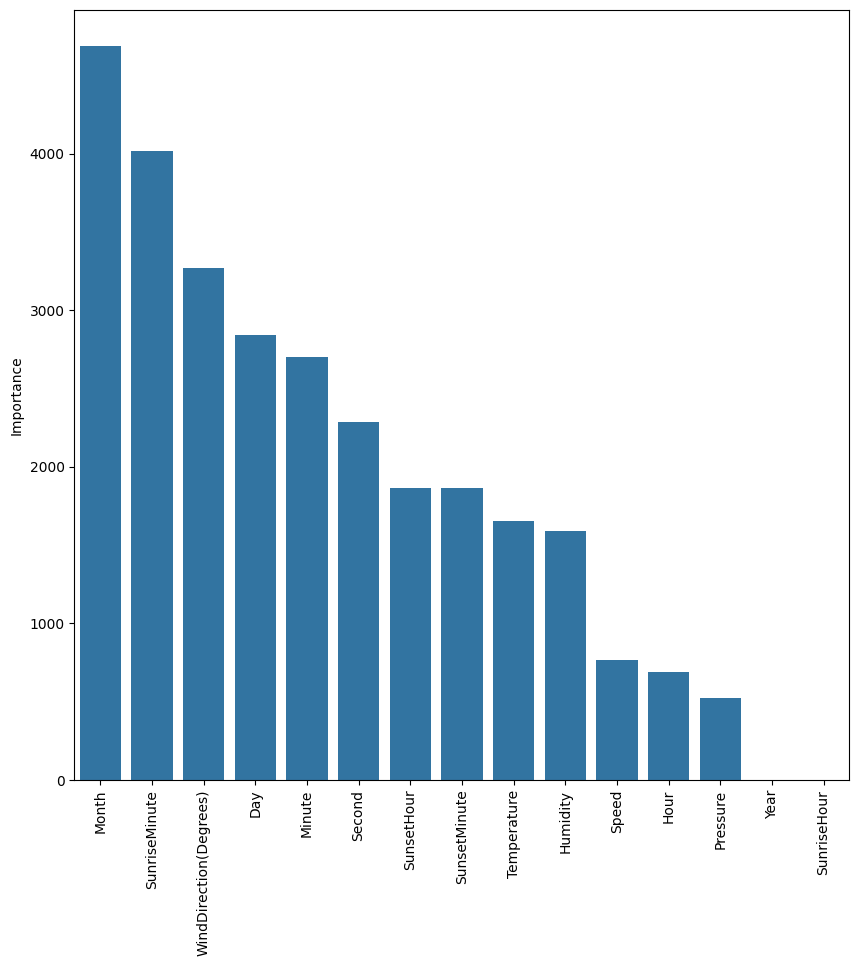

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(imp.Importance)
plt.xticks(rotation=90)
plt.show()

In [26]:
# Ensure MinMaxScaler is imported
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Now you can use MinMaxScaler
scalar=MinMaxScaler()
scaled_input_features=scalar.fit_transform(input_features)
input_features_columns=input_features.columns

In [7]:
# Previous cells...
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor # Import the XGBRegressor

# Reload the dataframe if it's been deleted (assuming it's from "SolarPrediction.csv")
df = pd.read_csv("SolarPrediction.csv")

# Perform data preprocessing steps from previous cells (e.g., extracting month, day, etc.)

# Drop the problematic columns from the DataFrame
df.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)

# Define input_features and output_features
input_features = df.drop(['Radiation'], axis=1)
output_features = df['Radiation']

# Ensure input_features and output_features are defined

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(input_features, output_features, test_size=0.3)  # Adjust test_size as needed

# Now fit the model
model = XGBRegressor() # Create an instance of the XGBRegressor model
model.fit(xTrain, yTrain)  # Fit the model to your training data

# Now you can access feature importances
imp = pd.DataFrame(model.feature_importances_, index=input_features.columns, columns=['Importance'])  # Use input_features.columns here
imp.sort_values(by='Importance', ascending=False, inplace=True)
imp

,Importance
Temperature,0.690165
UNIXTime,0.115127
Humidity,0.075676
Pressure,0.047328
Speed,0.038843
WindDirection(Degrees),0.032861


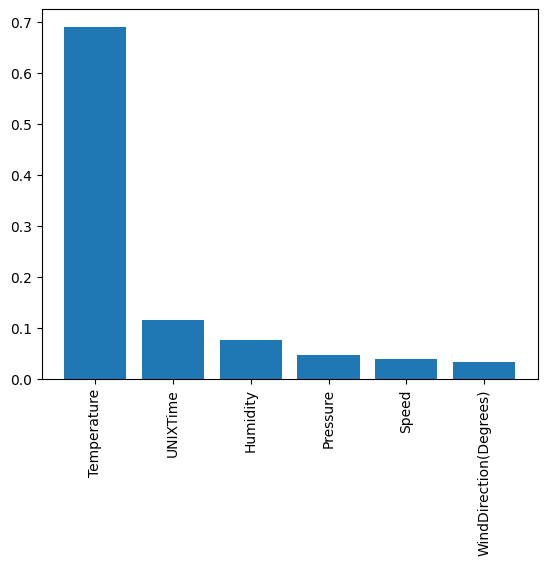

In [10]:
import matplotlib.pyplot as plt # This line imports matplotlib.pyplot and assigns it to the alias 'plt'

plt.bar(imp.index,imp['Importance'])
plt.xticks(rotation=90)
plt.show()

In [11]:
#feature Engineering

In [15]:
# Drop the columns from the original dataframe before creating input_features
df = pd.read_csv("SolarPrediction.csv")  # Assuming you reloaded the DataFrame

# ... (Your other preprocessing steps to extract month, day, etc.)

# Drop only the columns that exist in the original DataFrame
df.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)  # Remove 'Year', 'SunriseHour'

# Now define input_features
input_features = df.drop(['Radiation'], axis=1)
output_features = df['Radiation']

# ... (Rest of your code)

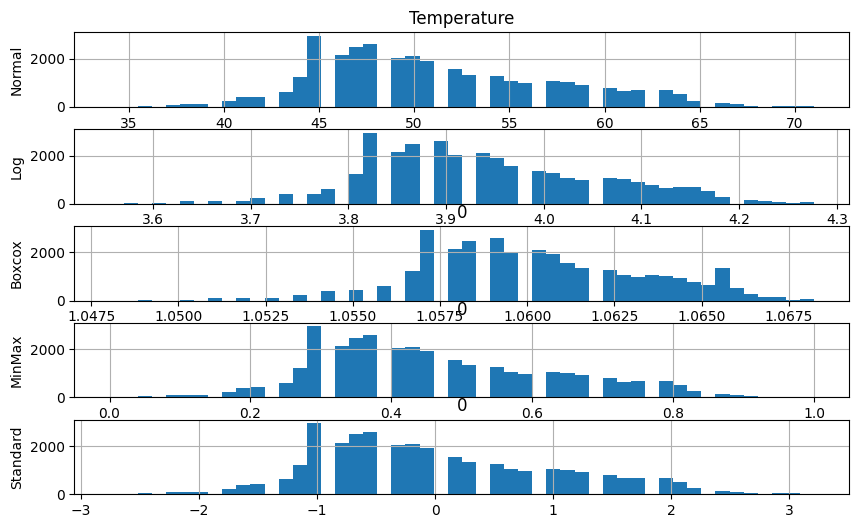

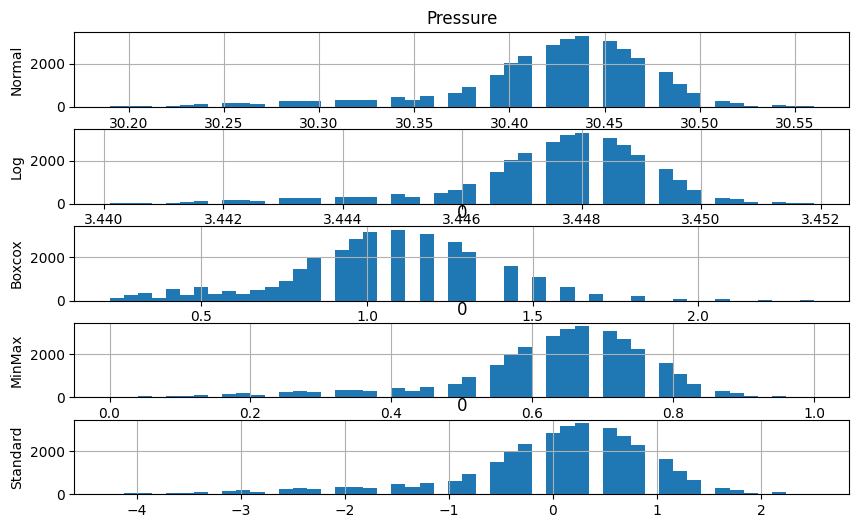

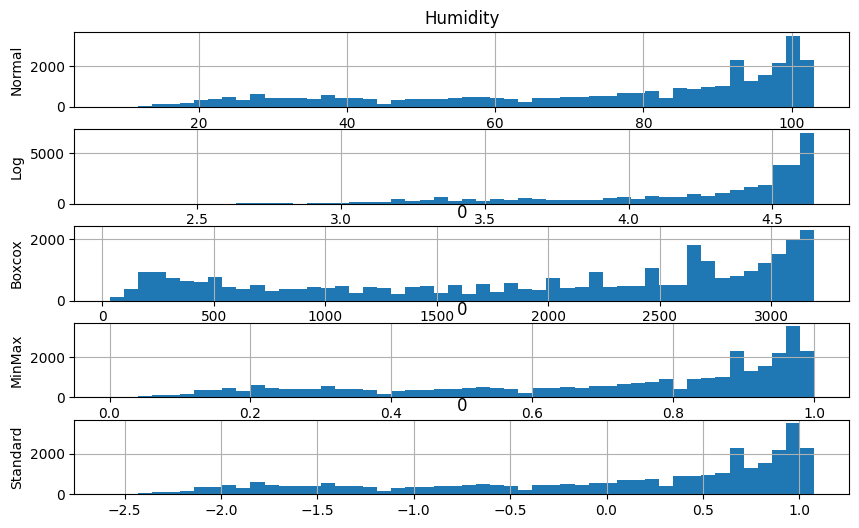

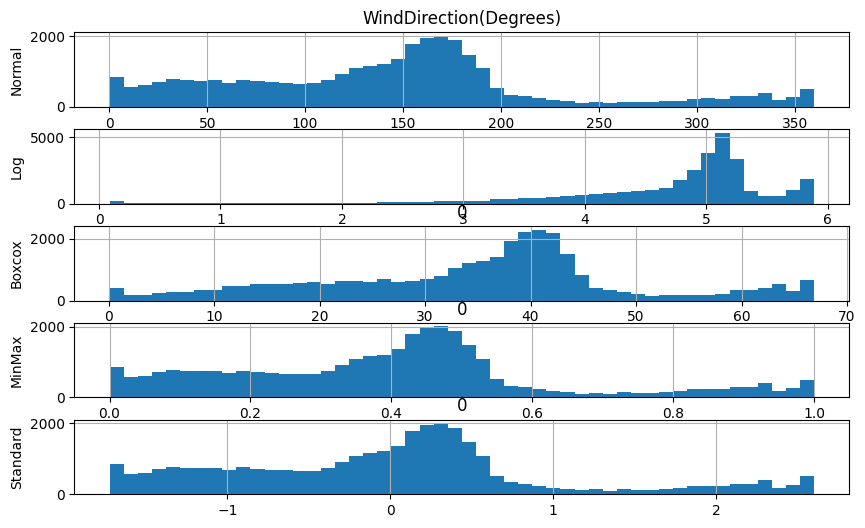

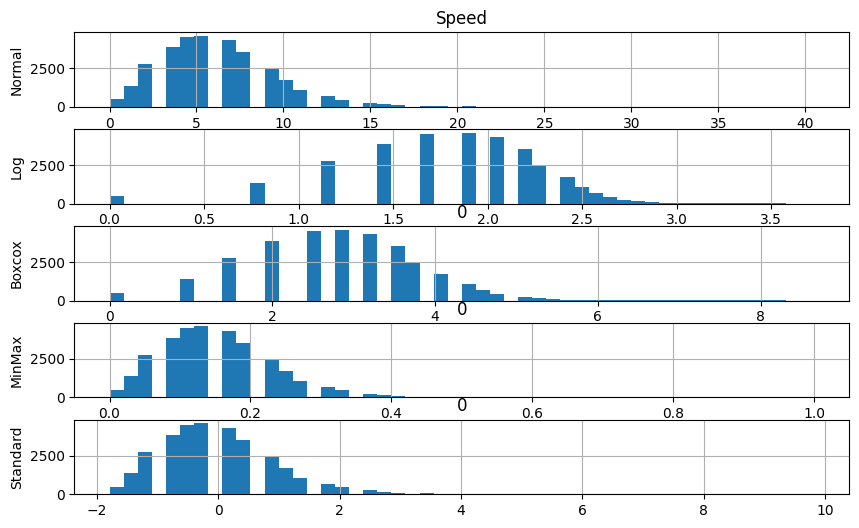

In [21]:
import numpy as np # Import numpy for numerical computations
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

transform_features=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']
for i in transform_features:
    fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(5,1, figsize=(10,6))
    input_features[i].hist(ax=ax1, bins=50)
    ((input_features[i]+1).transform(np.log)).hist(ax=ax2, bins=50) # Now np.log is recognized
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax=ax3, bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(pd.DataFrame(input_features[i]))).hist(ax=ax4, bins=50)
    pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame(input_features[i]))).hist(ax=ax5, bins=50)
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Boxcox')
    ax4.set_ylabel('MinMax')
    ax5.set_ylabel('Standard')
    ax1.set_title(i)

In [22]:
transform={'Temperture':(input_features["Temperature"]+1).transform(np.log),
           'Speed': (input_features['Speed']+1).transform(np.log),
           'WindDirection(Degrees)': MinMaxScaler().fit_transform(pd.DataFrame(input_features['WindDirection(Degrees)'])),
           'Pressure': stats.boxcox(input_features['Pressure']+1)[0],
           'Humidity': stats.boxcox(input_features['Humidity']+1)[0]}


In [23]:
for i in transform:
    input_features[i]=transform[i]

In [24]:
xTrain, xTest, yTrain, yTest=train_test_split(input_features,output_features, test_size=0.3)

In [25]:
pd.DataFrame(xTrain)

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Temperture
5016,1473614121,47,1.327548e+297,1687.550301,0.515312,1.890095,3.871201
777,1474992921,46,7.026659e+296,1998.813372,0.503557,1.178655,3.850148
31162,1481268050,52,7.981408e+296,1034.979035,0.260212,1.474763,3.970292
26945,1482536449,58,1.029521e+297,1440.379323,0.027149,2.182675,4.077537
18955,1479666318,50,1.169123e+297,1952.847697,0.421219,2.505526,3.931826
...,...,...,...,...,...,...,...
20038,1479341101,66,9.065149e+296,106.963401,0.311510,2.408745,4.204693
14982,1475700323,55,1.327548e+297,3134.681143,0.187906,0.751416,4.025352
22015,1478747702,57,1.029521e+297,1730.512808,0.881509,2.047693,4.060443
11467,1476776420,52,1.327548e+297,3021.665179,0.253237,1.704748,3.970292


In [26]:
scaler=StandardScaler()
xTrain=scaler.fit_transform(xTrain)
xTest=scaler.transform(xTest)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:81: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


#XGBoost

In [17]:
from xgboost import XGBRegressor

model=XGBRegressor(learning_rate=0.1,max_depth=8)
model.fit(xTrain,yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred=model.predict(xTest)

In [32]:
# ipython-input-31-06f75f5fc684
import numpy as np # Import numpy to use np.sqrt and potentially other numpy functions
from sklearn.metrics import mean_squared_error, r2_score # Import mean_squared_error here

rmse=np.sqrt(mean_squared_error(yTest,y_pred))
r2=r2_score(yTest,y_pred)

print(f"rmse : {rmse:.2f}")
print(f"r2 : {r2:.2f}")

rmse : 430.33
r2 : -0.87


#Multilayer Perceptron Model

In [27]:
yTrain.apply(lambda x: x/100)

,Radiation
5016,2.5467
777,0.0726
31162,0.0123
26945,7.9295
18955,4.4341
...,...
20038,7.7321
14982,4.3934
22015,0.5440
11467,0.0122


In [28]:

yTest.apply(lambda x: x/100)

,Radiation
28055,0.4828
25170,0.0921
646,0.6665
17381,0.0120
25273,4.0992
...,...
697,3.5571
27269,7.5772
22629,7.9127
29898,0.0489


In [33]:
from tensorflow.keras.models import Sequential # This line imports the Sequential class directly
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD

# ... (Rest of your code)

model=Sequential([
    Dense(123,activation='relu',input_dim=16),
    Dropout(0.33),
    Dense(64,activation='relu'),
    Dropout(0.33),
    Dense(32,activation='relu'),
    Dropout(0.33),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 123)                 │           2,091 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 123)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,140 (47.42 KB)

 Trainable params: 12,140 (47.42 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# ... previous code ...

# Ensure input_features has 16 columns (or the correct number of features)
input_features = df.drop(['Radiation'], axis=1)
output_features = df['Radiation']
#check to make sure there are 16 columns
print(input_features.shape)
# ... (Rest of your code for scaling, splitting, and model creation)...


# Before fitting the model, verify the shapes
print("xTrain shape:", xTrain.shape)
print("xTest shape:", xTest.shape)
print("yTrain shape:", yTrain.shape)
print("yTest shape:", yTest.shape)

# Change input_dim in the first Dense layer to match the actual number of features
model=Sequential([
    Dense(123,activation='relu',input_dim=xTrain.shape[1]), # Use xTrain.shape[1] to get the actual number of features
    Dropout(0.33),
    Dense(64,activation='relu'),
    Dropout(0.33),
    Dense(32,activation='relu'),
    Dropout(0.33),
    Dense(1)
])

# Compile the model before fitting
model.compile(optimizer='adam',loss='mse',metrics=['mse']) # Add this line to compile the model

history=model.fit(xTrain,yTrain,validation_split=0.1,epochs=20,batch_size=32)

# ... rest of your code ...


(32686, 6)
xTrain shape: (22880, 7)
xTest shape: (9806, 7)
yTrain shape: (22880,)
yTest shape: (9806,)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


644/644 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 10/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 123)                 │             984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 123)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,033 (43.10 KB)

 Trainable params: 11,033 (43.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 10/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3m

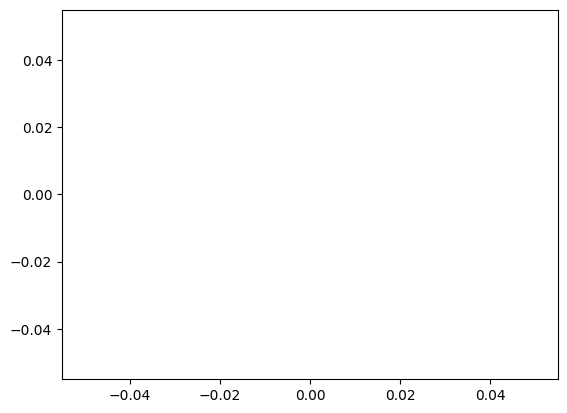

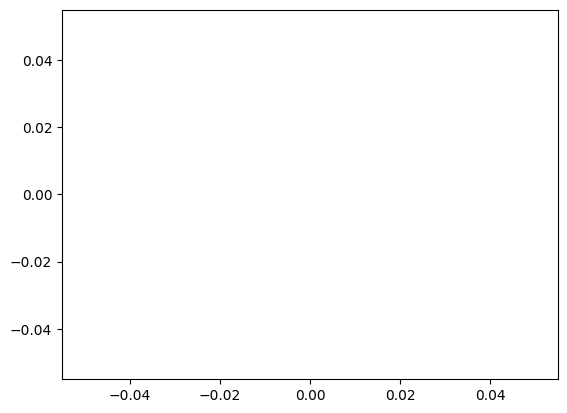

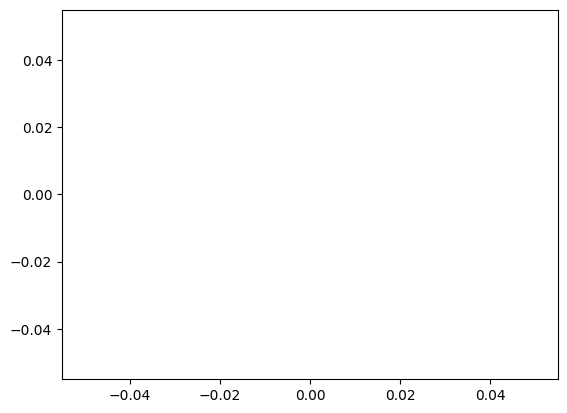

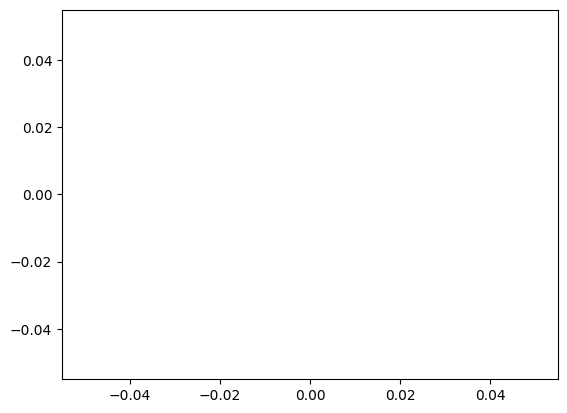

In [46]:
# Previous cell
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD

#Change input_dim to match xTrain.shape[1] which should be 7
model=Sequential([
    Dense(123,activation='relu',input_dim=xTrain.shape[1]), # Use xTrain.shape[1] to get the actual number of features
    Dropout(0.33),
    Dense(64,activation='relu'),
    Dropout(0.33),
    Dense(32,activation='relu'),
    Dropout(0.33),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mse'])
model.summary()

# In the cell where the error occurred:
history = model.fit(xTrain,yTrain,validation_split=0.1,epochs=20,batch_size=32) # Assign the result of model.fit to history
fit = history.history # Access the history attribute after the model is trained
for i in fit:
    plt.plot(fit[i])
    plt.show()